# Reinforcement Q-learning with RNN as function approximation

- portfolio grid of size 10 (0 to 1)
- 2 hidden neural layers with the first one being the recurrent layer (also has the weights of the previous 3 states as input)
- Improved by Dropout 
- Transaction costs 

In [1]:
# initialization
import numpy as np
import pandas as pd
import random
import tensorflow as tf
from random import randint
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
# import real data
mdata = pd.read_csv('data_ext.csv') #Three stocks (R,X_s,X_b) Without predictors
mdata = np.array(mdata[['r','xs','xb','snom','spe','sspr']])

In [2]:
# import real data
mdata = pd.read_excel('sim_data_CER.xlsx') #Three stocks (R,X_s,X_b) Without predictors
mdata = np.array(mdata[['r','xs','xb']])

In [7]:
#hyperparameters
series_length = 15                                           
batch_size = 1                                              
truncated_backprop_length = series_length//batch_size       # How many previous stock returns to take as input for the model
state_size = 4                                              # Number of nodes in the first hidden layer
num_classes = 10                                            # Number of classes to predict (10 actions possible so 10 classes)
echo_step = 3                                               # How many previous states the neural network takes as input
num_stocks = 6                                              # Amount of stocks into consideration
gamma = 0.95                                                   # Discount factor of future Q-values
epsilon = 0.1                                               # For the randomization of actions
# n = mdata.size/7-4                                          # Length of the total data
n = 707
periods = 60                                                # How many periods in the future to predict
epochs = 10                                                  # Amount of iterations to train the Neural Network
TC = 0                                                      # Percentage of transaction costs
dropout_prob = (1 - 0.8)                                    # Percentage of neuron nodes to keep in the Network using dropout
qlearningrate = 0.1

# Initialization of the Tensorflow placeholders and the network

In [5]:
#Initialize Recurrent Neural Network and set-up the placeholders
tf.reset_default_graph()
NN_input = tf.placeholder(tf.float32, [num_stocks, batch_size, truncated_backprop_length])
init_state = tf.placeholder(tf.float32, [num_stocks, batch_size, state_size])
Q_Next = tf.placeholder(tf.float32, [truncated_backprop_length, batch_size, num_classes])

# Weights and biases
W = tf.Variable(np.random.rand(num_stocks, state_size+1, state_size), dtype=tf.float32)
b = tf.Variable(np.zeros((num_stocks,1,state_size)), dtype=tf.float32)
W2 = tf.Variable(np.random.rand(num_stocks, state_size, num_classes),dtype=tf.float32)
b2 = tf.Variable(np.zeros((num_stocks, 1,num_classes)), dtype=tf.float32)

# Actually all transformations need their own weigths and biases!!
# Feature for later

inputs_series = tf.unstack(NN_input, axis=2)
labels_series = tf.unstack(Q_Next, axis=0)

#Forward pass
current_state = init_state
states_series = []

for current_input in inputs_series:
    current_input = tf.reshape(current_input, [num_stocks,batch_size, 1])
    input_and_state_concatenated = tf.concat([current_input, current_state],axis=2)  # Increasing number of columns
    next_state = tf.tanh(tf.matmul(input_and_state_concatenated,W) + b)  # Broadcasted addition
    dropout_state = tf.nn.dropout(next_state,dropout_prob)     # DROPOUT
    states_series.append(dropout_state)
    current_state = next_state

#calculate loss
Q_FA = [tf.nn.relu(tf.matmul(state, W2) + b2) for state in states_series]
# dropout_Q = tf.nn.dropout(Q_FA,dropout_prob)    # DROPOUT
# Q_FA = tf.reduce_sum(dropout_Q,axis=1)
Q_FA = tf.reduce_sum(Q_FA,axis=1)
A_Max = tf.argmax(Q_FA[-1],1) # only use the latest Q of the RNN for the determination of the optimal weights
Q_series = tf.unstack(Q_FA, axis=0)

# Calculate loss for the NN from the Q values
losses = [ abs(logits - labels) for logits, labels in zip(Q_series,labels_series)]
total_loss = tf.reduce_mean(losses)
# loss = tf.reduce_sum(tf.square(Q_Next - Q_FA))
trainer = tf.train.GradientDescentOptimizer(learning_rate=0.001)
updateModel = trainer.minimize(total_loss)

#Define Action Matrix (Now discrete case) 
A = np.linspace(0,1,10) # portfolio weights of stocks (1-weight) is the weight in the bonds

# Training of the RNN function approximation

240


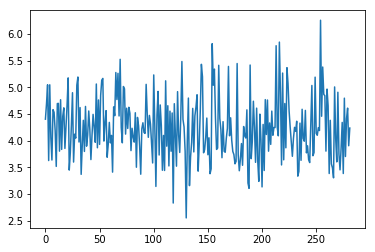

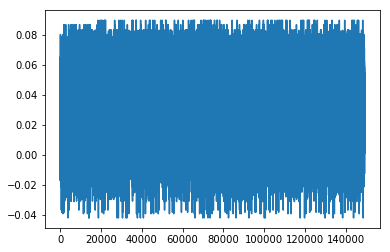

Writing away results
[ 0.          0.88888889  0.66666667  0.44444444  0.66666667  0.
  0.33333333  0.77777778  0.33333333  0.33333333  0.88888889  0.55555556
  0.33333333  0.33333333  0.33333333  0.          0.88888889  0.
  0.55555556  0.          0.33333333  1.          0.33333333  0.33333333
  0.33333333  0.44444444  0.88888889  0.88888889  0.33333333  0.88888889
  0.55555556  0.55555556  0.33333333  0.33333333  0.66666667  0.77777778
  0.88888889  0.66666667  0.33333333  0.55555556  0.          0.33333333
  0.          0.33333333  0.77777778  0.33333333  0.55555556  0.33333333
  0.66666667  1.          0.33333333  0.55555556  0.33333333  0.33333333
  0.66666667  0.55555556  0.66666667  0.          0.33333333]
241


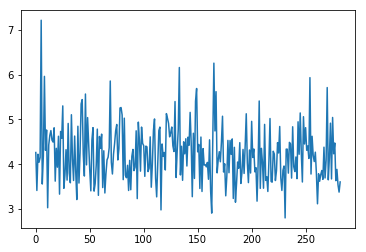

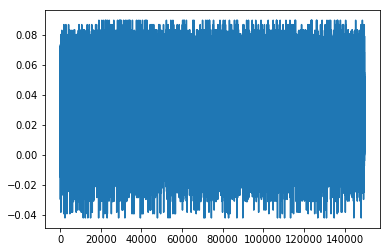

Writing away results
[ 0.33333333  0.33333333  0.33333333  0.33333333  0.88888889  0.33333333
  0.77777778  0.66666667  0.33333333  0.33333333  0.33333333  0.88888889
  0.          0.33333333  0.33333333  0.33333333  0.33333333  0.44444444
  0.55555556  0.33333333  0.33333333  0.88888889  0.88888889  0.44444444
  0.55555556  0.55555556  0.          0.77777778  0.          0.88888889
  1.          0.55555556  0.55555556  0.          0.55555556  0.33333333
  1.          0.          0.33333333  1.          0.33333333  0.55555556
  0.33333333  0.11111111  1.          0.66666667  0.66666667  0.33333333
  0.66666667  0.55555556  0.33333333  0.66666667  1.          0.33333333
  0.33333333  0.33333333  0.33333333  0.88888889  0.33333333]
242


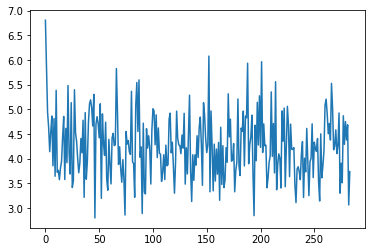

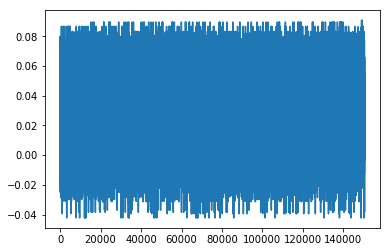

Writing away results
[ 0.33333333  0.33333333  0.          0.44444444  0.88888889  1.
  0.55555556  0.33333333  0.55555556  0.66666667  0.66666667  0.33333333
  0.33333333  0.44444444  0.66666667  0.55555556  0.          1.
  0.44444444  0.33333333  0.33333333  0.44444444  0.          0.55555556
  0.88888889  0.66666667  0.33333333  0.66666667  0.33333333  0.11111111
  0.66666667  0.55555556  0.33333333  0.55555556  0.          0.33333333
  0.66666667  0.33333333  0.          1.          0.88888889  0.33333333
  0.33333333  0.55555556  0.33333333  0.          0.33333333  0.
  0.44444444  0.33333333  0.33333333  0.          0.55555556  1.
  0.55555556  0.33333333  1.          0.33333333  1.        ]
243


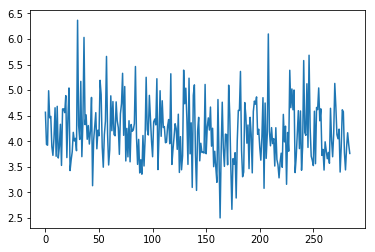

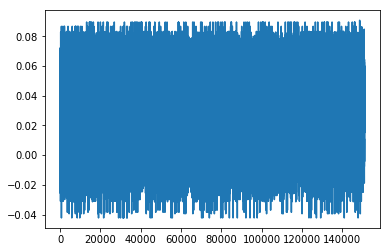

Writing away results
[ 0.55555556  0.33333333  1.          0.33333333  0.11111111  0.33333333
  0.66666667  0.33333333  0.          1.          0.88888889  0.88888889
  0.55555556  0.11111111  0.66666667  0.33333333  0.88888889  0.55555556
  0.33333333  0.66666667  0.11111111  0.          0.33333333  0.88888889
  0.33333333  0.33333333  0.55555556  0.33333333  0.33333333  0.33333333
  0.33333333  0.33333333  0.55555556  0.          0.88888889  0.66666667
  0.33333333  0.33333333  0.33333333  0.33333333  0.33333333  0.33333333
  0.55555556  0.33333333  0.55555556  0.33333333  0.88888889  0.55555556
  0.88888889  0.          0.88888889  0.55555556  1.          0.55555556
  0.          0.33333333  0.77777778  0.55555556  0.        ]
244


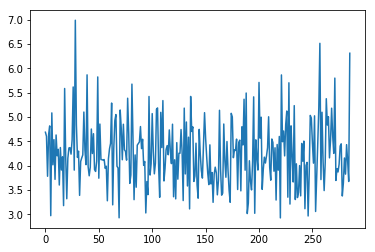

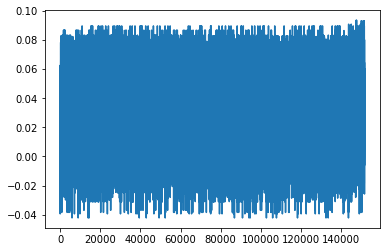

Writing away results
[ 0.33333333  0.77777778  0.          0.88888889  0.66666667  0.33333333
  0.88888889  0.33333333  0.55555556  0.33333333  0.33333333  1.
  0.88888889  0.55555556  0.33333333  0.88888889  0.          0.33333333
  0.33333333  0.33333333  0.33333333  0.33333333  0.          0.66666667
  0.55555556  0.55555556  0.33333333  0.33333333  0.55555556  0.88888889
  0.33333333  0.55555556  0.88888889  0.44444444  0.33333333  0.66666667
  0.66666667  0.33333333  0.33333333  0.55555556  1.          0.55555556
  0.33333333  0.          0.33333333  0.33333333  0.33333333  0.33333333
  0.33333333  0.55555556  0.66666667  0.          0.33333333  0.66666667
  0.44444444  0.88888889  0.66666667  0.44444444  0.66666667]
245


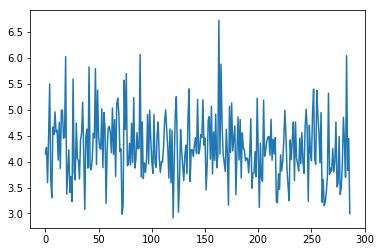

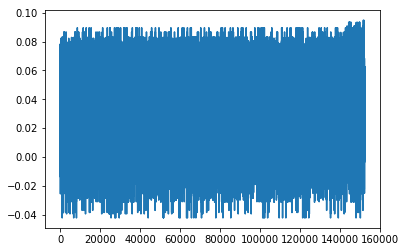

Writing away results
[ 0.88888889  0.          0.11111111  0.33333333  0.55555556  0.66666667
  0.          0.66666667  0.33333333  0.55555556  0.33333333  0.33333333
  0.55555556  0.11111111  0.55555556  0.66666667  0.33333333  0.33333333
  0.33333333  0.88888889  0.          0.66666667  0.33333333  0.33333333
  0.44444444  0.33333333  0.88888889  0.55555556  0.44444444  0.33333333
  0.33333333  0.44444444  0.44444444  1.          0.33333333  0.55555556
  0.77777778  0.55555556  0.55555556  0.55555556  0.55555556  0.33333333
  0.33333333  0.          0.55555556  0.88888889  0.66666667  0.55555556
  0.55555556  0.88888889  0.55555556  0.11111111  0.55555556  0.33333333
  0.44444444  0.55555556  0.55555556  0.33333333  0.33333333]
246


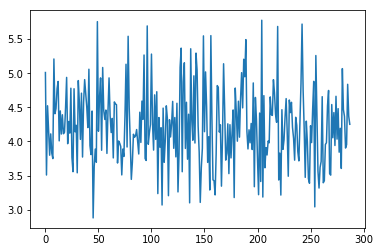

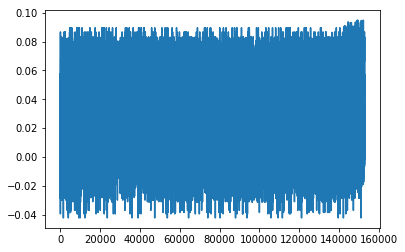

Writing away results
[ 0.88888889  0.77777778  0.          0.33333333  0.33333333  0.88888889
  0.66666667  0.44444444  0.44444444  1.          1.          0.
  0.55555556  0.88888889  0.33333333  0.          0.55555556  0.55555556
  0.66666667  0.55555556  1.          0.88888889  0.33333333  0.
  0.33333333  0.66666667  1.          0.33333333  0.44444444  1.
  0.33333333  0.33333333  0.33333333  0.33333333  0.          0.66666667
  0.33333333  0.33333333  0.33333333  0.33333333  0.          0.
  0.55555556  0.          0.55555556  0.77777778  0.66666667  0.33333333
  0.33333333  0.66666667  0.          0.33333333  0.33333333  0.33333333
  0.88888889  0.66666667  0.55555556  0.66666667  0.        ]
247


In [ ]:
### initialization for insight series
TWlist = []
Index = []
MWeights = []
Turnover = []
RU = []

with tf.Session() as sess:
    for i in range(240,443):
        OptimalWeights = np.zeros(periods-1)
        currentK = 0;
        print(i)
        rlist = []
        end = 0
        
        while currentK < periods - 1:
            #Initilization
            NN_data = mdata[0:i+currentK]  # rolling window
            #initialize an empty hidden state
            _current_state = np.zeros((num_stocks, batch_size, state_size))
            sess.run(tf.global_variables_initializer()) # initialize the Neural Network again
            # NN_data = mdata[0:i+currentK]   #Expanding window
            rAll = 0
            currentEpoch = 0
            
            while currentEpoch < epochs:
                a_old = 0
                epoch_loss = []
                
                # Randomizing of the data by the indexes
                indexes = np.asarray(range(0,len(NN_data)-truncated_backprop_length-1))
                end = len(NN_data)-truncated_backprop_length-1
                np.random.shuffle(indexes)
                
                #Training of the Q-Network for the data available (with Neural Nets) 
                for j in indexes:
                    s = NN_data[j:j+truncated_backprop_length,0:num_stocks].reshape(num_stocks,batch_size,truncated_backprop_length)
                    #Choose an action by greedily (with e chance of random action) from the Q-network
                    a_int,allQ = sess.run([A_Max,Q_FA],feed_dict={NN_input:s, init_state:_current_state})
                    a = A[a_int-1]  # -1 because the output neurons are labeled 1 till 101 and it will be an index
                    if np.random.rand(1) < epsilon:
                        a = random.choice(A)

                    #Get new state and reward from environment
                    s1 = NN_data[j+truncated_backprop_length:j+truncated_backprop_length+1,1:4]
#                   s1 = mdata[i+currentK+j+truncated_backprop_length+1,1:4]
#                     print(s1)
                    r = (a*s1[0][1] + (1-a)*s1[0][2] - TC*abs(a-a_old)) #reward: this is now the wealth gained from this step, but could be other rewards like utility
                    rlist.append(r)
                    ## idea: ADD also exp(s1) to the transaction costs
                    a_old = a
                    s1 = NN_data[j+1:j+truncated_backprop_length+1,0:num_stocks].reshape(num_stocks,batch_size,truncated_backprop_length)
                    Q = sess.run(Q_FA,feed_dict={NN_input:s1, init_state:_current_state})
                    
                    #Obtain maxQ' and set our target value for chosen action.
                    Q1 = np.max(Q[-1])
                    targetQ = allQ
#                     targetQ[-1,0,int(a*9)] = r + gamma*Q1
                    targetQ[-1,0,int(a*9)] = targetQ[-1,0,int(a*9)] + qlearningrate*(r + gamma*Q1 - targetQ[-1,0,int(a*9)]) 
            
                    ### idea: Print the losses 
        
                    #Train the neural network using target and predicted Q values
                    s = s1
                    _,_current_state,W1,_total_loss = sess.run([updateModel,current_state,NN_input,total_loss],feed_dict={NN_input:s,Q_Next:targetQ, init_state:_current_state})
                    epoch_loss.append(_total_loss)
                currentEpoch += 1
#                 print(sum(epoch_loss))
                    
            # After training now calculate the optimal weights for the K=60 periods to come
            s1 = NN_data[end:end+truncated_backprop_length,0:num_stocks].reshape(num_stocks,batch_size,truncated_backprop_length)
            a_int,allQ = sess.run([A_Max,Q_FA],feed_dict={NN_input:s, init_state:_current_state})
            aOpt = A[a_int-1]
            OptimalWeights[currentK] = aOpt
            currentK += 1
        
        plt.ion()
        plt.plot(epoch_loss)
        plt.show()
        plt.plot(rlist)
        plt.show()
        
        firstdiff = OptimalWeights[1:] - OptimalWeights[:-1]
        # For insight purposes
        MWeights.append(np.mean(OptimalWeights))
#         x = mdata[i+currentK+j+truncated_backprop_length+1,1:4]
        x = mdata[end + truncated_backprop_length - currentK:end+truncated_backprop_length,1:4]
        TerminalWealth = np.exp(sum(OptimalWeights*x[:,0] + (1-OptimalWeights)*x[:,1]))
        TWlist.append(TerminalWealth)
        Index.append(i)
        # Turnover
        Turnover.append(sum(abs(firstdiff*np.exp(mdata[i+1:i+currentK,1])) + abs((1-firstdiff)*np.exp(mdata[i+1:i+currentK,2]))))
        # Realized Utility
        RU.append((1/(1-5))*pow(TerminalWealth,(1-5)))
        
        print('Writing away results')
        df = pd.DataFrame({'index date':Index,'TW':TWlist, 'Mean Weights Xs':MWeights,'Turnover':Turnover, 'Realized Utility':RU})
        df.to_excel('RNN_e5_new_0-1.xlsx', sheet_name='sheet1', index=False)
        print(OptimalWeights)
        
    # close session
plt.plot(MWeights)
plt.plot(TWlist)